In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
Data = pd.read_csv('./Indices/Processed_Indices.csv',index_col=0)
Data.head()

,Aord,Nikkei,Hsi,Daxi,Dji,Nasdaq,Sp500,Spy,NIFTY_Previous,NIFTY
Date,,,,,,,,,,
2008-01-04,6387.700195,15155.730469,27004.339844,7941.520020,13044.12012,2611.959961,1447.550049,144.910004,6184.250000,6179.100098
2008-01-07,6233.200195,14549.379883,26962.539063,7913.529785,13046.55957,2571.080078,1444.010010,143.339996,6179.100098,6271.000000
2008-01-08,6193.399902,14429.299805,27466.960938,7810.819824,12801.15039,2514.149902,1414.069946,141.809998,6271.000000,6282.450195
2008-01-09,6160.200195,14364.709961,26847.490234,7844.500000,12820.90039,2506.969971,1415.709961,142.080002,6282.450195,6287.549805
2008-01-10,6154.600098,14546.320313,27426.419922,7839.229980,12590.20996,2443.850098,1390.250000,139.089996,6287.549805,6278.100098


In [62]:
Data.shape

(2626, 10)

## Splitting Data

Last 500 days would be Test data and rest of the data would be for training

In [63]:
Train = Data[:-500]
Test = Data[-500:]
Test.head()

,Aord,Nikkei,Hsi,Daxi,Dji,Nasdaq,Sp500,Spy,NIFTY_Previous,NIFTY
Date,,,,,,,,,,
2016-08-17,5625.700195,16596.259766,22995.509766,10666.719727,18614.48047,5247.959961,2186.239990,218.600006,8670.250000,8639.799805
2016-08-18,5628.100098,16649.910156,23046.689453,10694.549805,18537.08984,5228.439941,2177.840088,218.000000,8639.799805,8648.849609
2016-08-19,5607.299805,16558.380859,23153.740234,10613.080078,18566.53906,5226.450195,2181.899902,218.339996,8648.849609,8694.299805
2016-08-22,5625.399902,16599.259766,22941.529297,10613.230469,18585.16992,5229.870117,2184.239990,218.309998,8694.299805,8667.000000
2016-08-23,5612.299805,16549.820313,22927.470703,10528.879883,18535.85938,5231.459961,2181.580078,218.259995,8667.000000,8628.349609


### Making Scratter Matrix

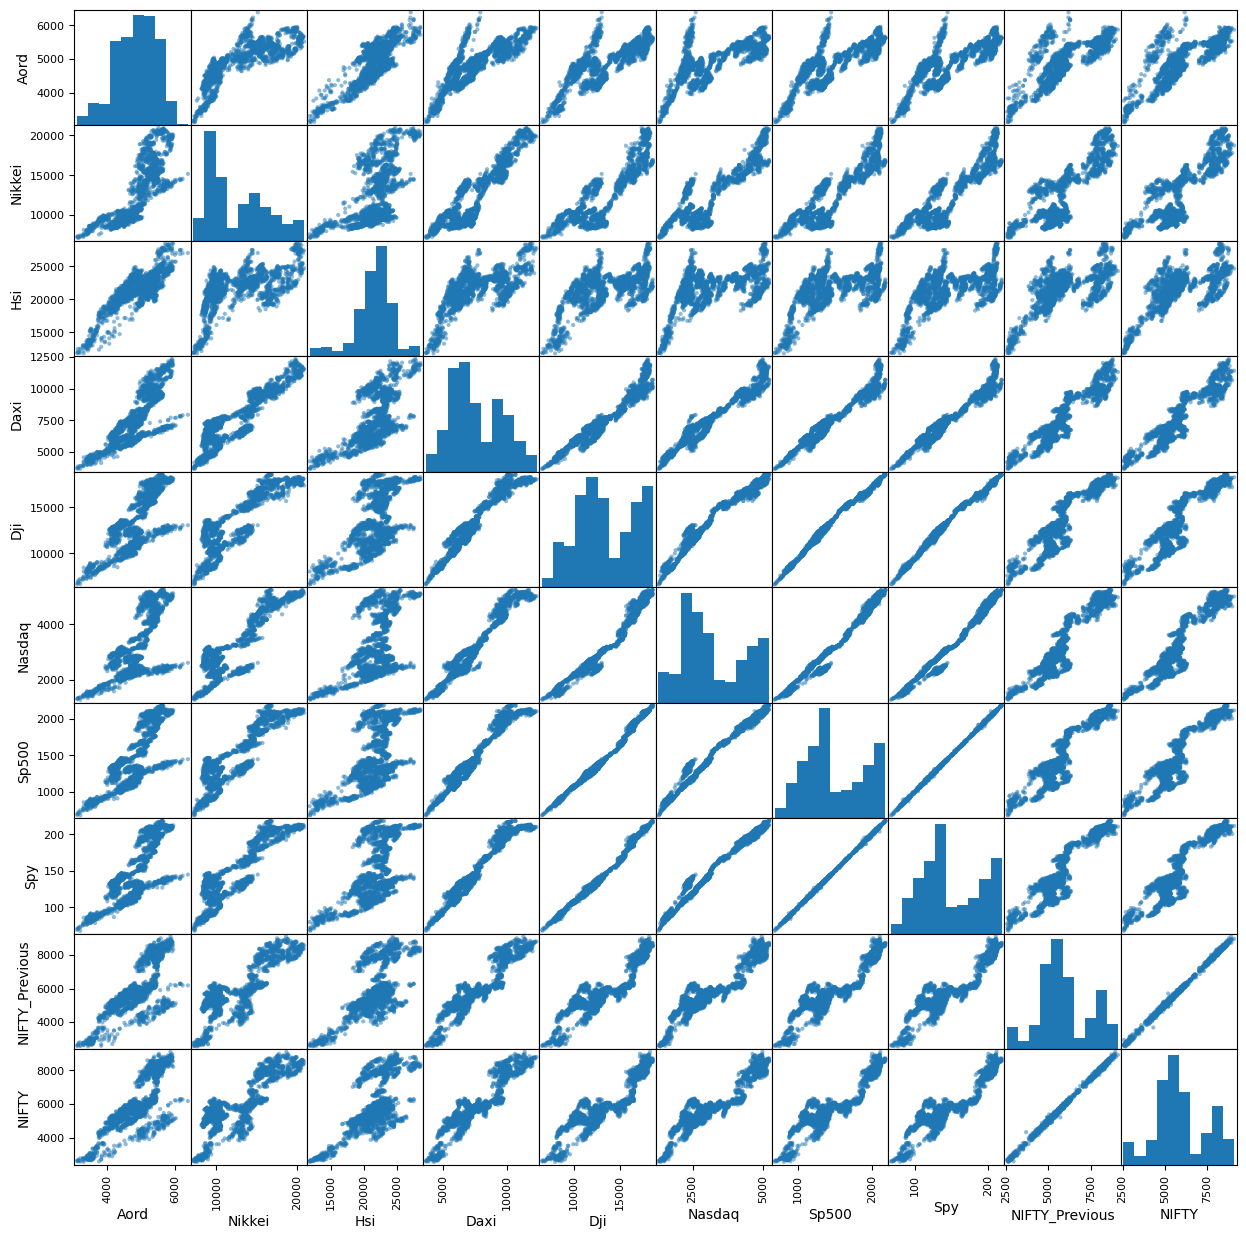

In [64]:
from pandas.plotting import scatter_matrix

SM = scatter_matrix(Train,figsize=(15,15))

<Axes: >

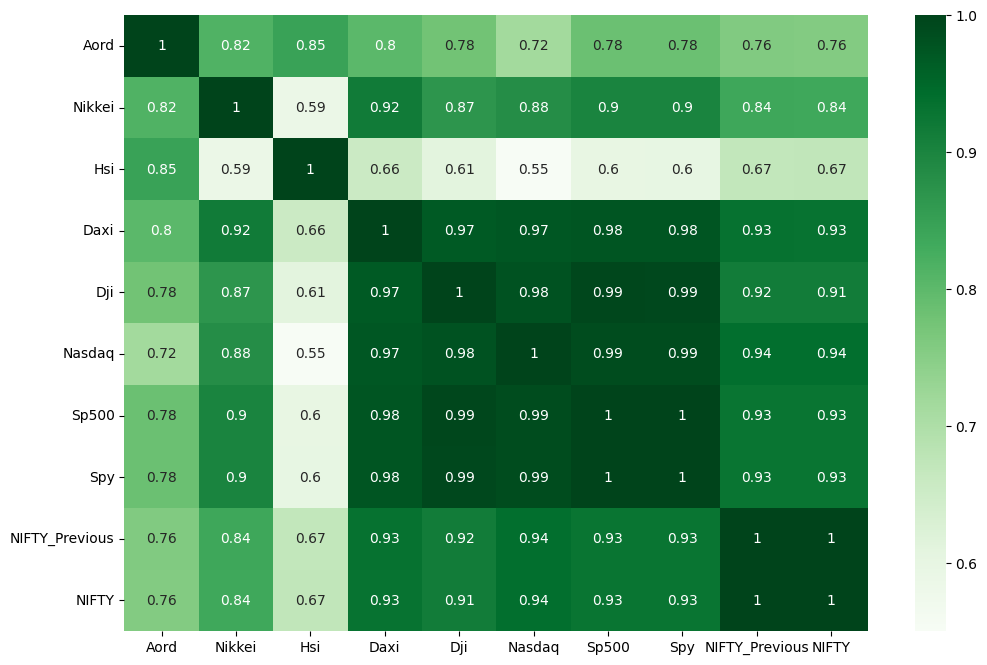

In [65]:
corMat = Train.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corMat,cmap = 'Greens',annot=True)

## Making Model - Multiple Models

Used 2 Stats Model -> Ols and Gls

In [66]:
import statsmodels.formula.api as smf

In [67]:
for1 = 'NIFTY~Aord+Nikkei+Hsi+Daxi+Dji+Nasdaq+Sp500+Spy+NIFTY_Previous'

In [68]:
Lm1 = smf.gls(formula=for1, data=Train).fit()
Lm2 = smf.ols(formula=for1, data=Train).fit()

In [69]:
Lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                  NIFTY   R-squared:                       0.998
Model:                            GLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.052e+05
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        02:59:27   Log-Likelihood:                -12083.
No. Observations:                2126   AIC:                         2.419e+04
Df Residuals:                    2116   BIC:                         2.424e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         26.5655     20.395      1.303      0.193     -13.432      66.563
Aord               0.0033      0.010      0.315      0.753      -0.017       0.024
Nikkei            -0.0029      0.002     -1.791      0.073      -0.006       0.000
Hsi                0.0059      0.002      3.937      0.000       0.003       0.009
Daxi              -0.0192      0.005     -3.794      0.000      -0.029      -0.009
Dji               -0.0255      0.008     -3.019      0.003      -0.042      -0.009
Nasdaq             0.0733      0.018      4.008      0.000       0.037       0.109
Sp500             -2.6436      0.203    -13.026      0.000      -3.042      -2.246
Spy               28.1495      1.858     15.147      0.000      24.505      31.794
NIFTY_Previous     0.9767      0.004    234.887      0.000       0.969       0.985
==============================================================================
Omnibus:                      249.778   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2208.939
Skew:                           0.167   Prob(JB):                         0.00
Kurtosis:                       7.983   Cond. No.                     4.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
Lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  NIFTY   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.052e+05
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        02:59:27   Log-Likelihood:                -12083.
No. Observations:                2126   AIC:                         2.419e+04
Df Residuals:                    2116   BIC:                         2.424e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         26.5655     20.395      1.303      0.193     -13.432      66.563
Aord               0.0033      0.010      0.315      0.753      -0.017       0.024
Nikkei            -0.0029      0.002     -1.791      0.073      -0.006       0.000
Hsi                0.0059      0.002      3.937      0.000       0.003       0.009
Daxi              -0.0192      0.005     -3.794      0.000      -0.029      -0.009
Dji               -0.0255      0.008     -3.019      0.003      -0.042      -0.009
Nasdaq             0.0733      0.018      4.008      0.000       0.037       0.109
Sp500             -2.6436      0.203    -13.026      0.000      -3.042      -2.246
Spy               28.1495      1.858     15.147      0.000      24.505      31.794
NIFTY_Previous     0.9767      0.004    234.887      0.000       0.969       0.985
==============================================================================
Omnibus:                      249.778   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2208.939
Skew:                           0.167   Prob(JB):                         0.00
Kurtosis:                       7.983   Cond. No.                     4.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Making Predection

In [76]:
Train_res = pd.DataFrame(index=Train.index)
Train_res['NIFTY'] = Train['NIFTY']

Train_res['Pre1'] = Lm1.predict(Train)
Train_res['Pre2'] = Lm2.predict(Train)

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(3,1,1)
plt.plot(Train_res.index,Train_res['NIFTY'],label='Nifty')
plt.subplot(3,1,2)
plt.plot(Train_res.index,Train_res['Pre1'],label='P1')
plt.subplot(3,1,3)
plt.plot(Train_res.index,Train_res['Pre2'],label='P2')
# plt.legend()
plt.show()

Plotting  the Differences

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,1,2)
plt.plot(Train_res.index,Train_res['Pre1'] - Train_res['NIFTY'])
plt.axhline(y=0, c='r')
plt.subplot(2,1,1)
plt.plot(Train_res.index,Train_res['Pre2'] - Train_res['NIFTY'])
plt.axhline(y=0, c='r')
plt.show()

In [81]:
Train_res.describe()

,NIFTY,Pre1,Pre2
count,2126.000000,2126.000000,2126.000000
mean,5925.376741,5925.376741,5925.376741
std,1506.775221,1505.094023,1460.576194
min,2553.600098,2543.393120,2433.481740
25%,5032.012695,5031.867794,4930.167858
50%,5630.175049,5633.810781,5629.460523
75%,7305.862549,7275.214940,7268.972120
max,9109.150391,9064.561462,8964.665307


Need To Calculate RMSE for both of the models

### Model Performance in Test Data

### Infrence -> Restructure
Both the model are almost produce the same result

## Making Models - Multiple Formulas

Using 2 Formulas for the Model training

In [74]:
# Formula 1 we will use the Nifty Previous day also
for1 = 'NIFTY~Aord+Nikkei+Hsi+Daxi+Dji+Nasdaq+Sp500+Spy+NIFTY_Previous'
# Formula 2 we will not use the Nifty Previous day also
for2 = 'NIFTY~Aord+Nikkei+Hsi+Daxi+Dji+Nasdaq+Sp500+Spy'

In [75]:
Lm1 = smf.ols(formula=for1, data=Train).fit()
Lm2 = smf.ols(formula=for2, data= Train).fit()